<a href="https://colab.research.google.com/github/NiranjanPrabakar/Machine-Learning-for-Robotics/blob/main/TamilNadu_Rainfall_Ensemble_Prediction_and_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  


<ipython-input-7-524a867a2908>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R2 Score"], palette="viridis")


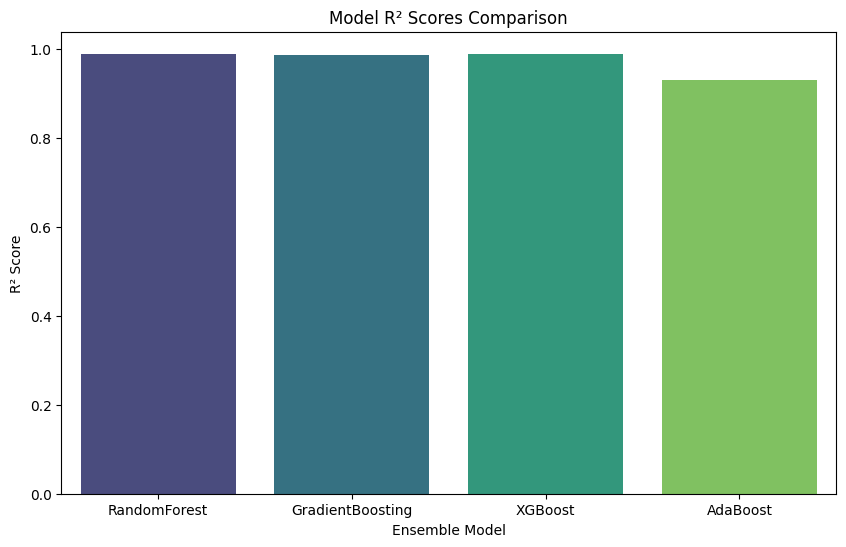

In [ ]:
# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Update the correct file path
file_path = "/content/drive/MyDrive/rainfall in india 1901-2015.csv"

# ✅ Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found at {file_path}. Please check the file location.")

# ✅ Load dataset
df = pd.read_csv(file_path)

# ✅ Display first few rows
print(df.head())

# ✅ Data Preprocessing (Fixing Error)
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Handle missing values

# ✅ Select features and target
X = df.drop(columns=["YEAR", "ANNUAL", "SUBDIVISION"])  # Remove non-numeric & target columns
y = df["ANNUAL"]

# ✅ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Define ensemble models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# ✅ Train and Evaluate Models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

# ✅ Visualizing Model Performance
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["R2 Score"], palette="viridis")
plt.title("Model R² Scores Comparison")
plt.ylabel("R² Score")
plt.xlabel("Ensemble Model")
plt.show()


                        MAE          MSE       RMSE  R2 Score
RandomForest      49.621087  4178.671230  64.642643  0.820715
GradientBoosting  48.826398  4282.718797  65.442485  0.816251
XGBoost           66.867911  7727.661782  87.907120  0.668446
AdaBoost          65.875566  6928.830119  83.239595  0.702720


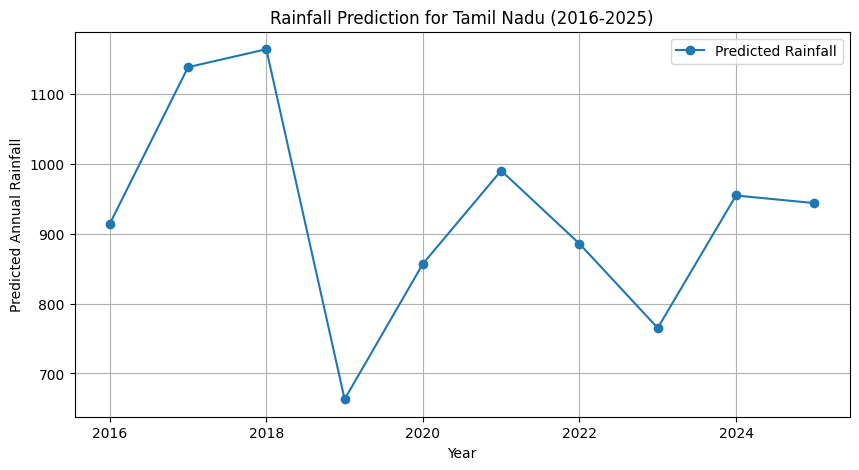

<ipython-input-8-c7ffd1da9c2b>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R2 Score"], palette="viridis")


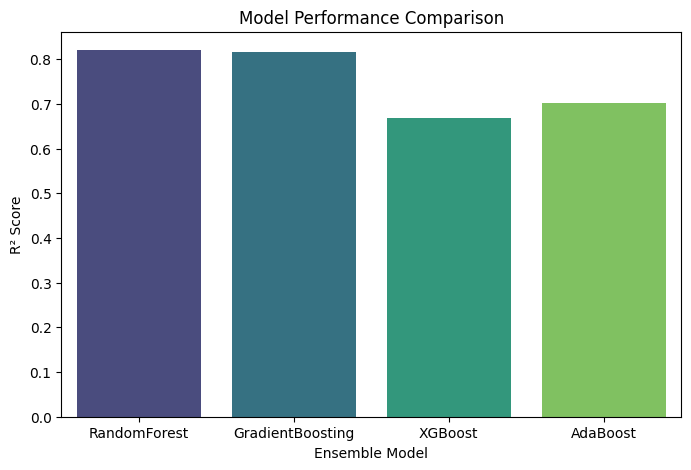

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score

# Load dataset
file_path = "/content/drive/MyDrive/rainfall in india 1901-2015.csv"
df = pd.read_csv(file_path)

# Handle missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Focus on Tamil Nadu data
tn_df = df[df['SUBDIVISION'].str.contains("TAMIL NADU", case=False)]

# Select features and target
X = tn_df.drop(columns=["YEAR", "ANNUAL", "SUBDIVISION"])
y = tn_df["ANNUAL"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ensemble models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Predict future rainfall (2016-2025)
years_future = np.arange(2016, 2026)
future_X = X.iloc[:10].copy()
future_X["YEAR"] = years_future
future_preds = models["XGBoost"].predict(future_X.drop(columns=["YEAR"]))

# Plot future predictions
plt.figure(figsize=(10, 5))
plt.plot(years_future, future_preds, marker='o', linestyle='-', label='Predicted Rainfall')
plt.xlabel("Year")
plt.ylabel("Predicted Annual Rainfall")
plt.title("Rainfall Prediction for Tamil Nadu (2016-2025)")
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["R2 Score"], palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("R² Score")
plt.xlabel("Ensemble Model")
plt.show()


<ipython-input-9-a6051a1ea921>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn.fillna(df_tn.median(numeric_only=True), inplace=True)


                        MAE          MSE       RMSE        R2
RandomForest      33.853957  1838.061021  42.872614  0.921138
GradientBoosting  28.010257  1597.374466  39.967167  0.931465
XGBoost           45.558131  3743.153551  61.181317  0.839401
AdaBoost          49.732639  3517.121818  59.305327  0.849099
   YEAR    Jan-Feb  Mar-May     Jun-Sep    Oct-Dec  Predicted Rainfall
0  2016  38.948913  134.575  333.434783  445.71087          930.680359
1  2017  38.948913  134.575  333.434783  445.71087          930.680359
2  2018  38.948913  134.575  333.434783  445.71087          930.680359
3  2019  38.948913  134.575  333.434783  445.71087          930.680359
4  2020  38.948913  134.575  333.434783  445.71087          930.680359
5  2021  38.948913  134.575  333.434783  445.71087          930.680359
6  2022  38.948913  134.575  333.434783  445.71087          930.680359
7  2023  38.948913  134.575  333.434783  445.71087          930.680359
8  2024  38.948913  134.575  333.434783  445.71087 

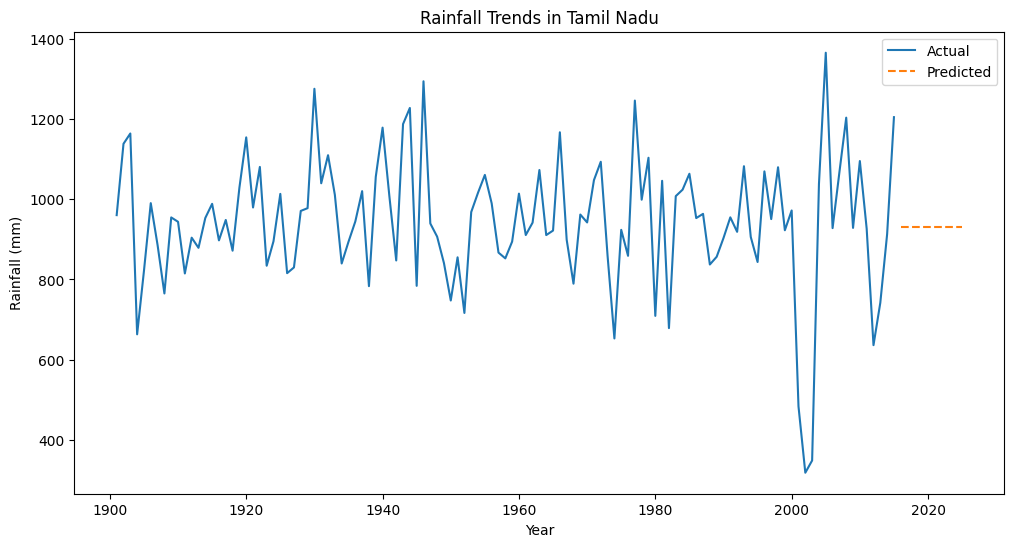

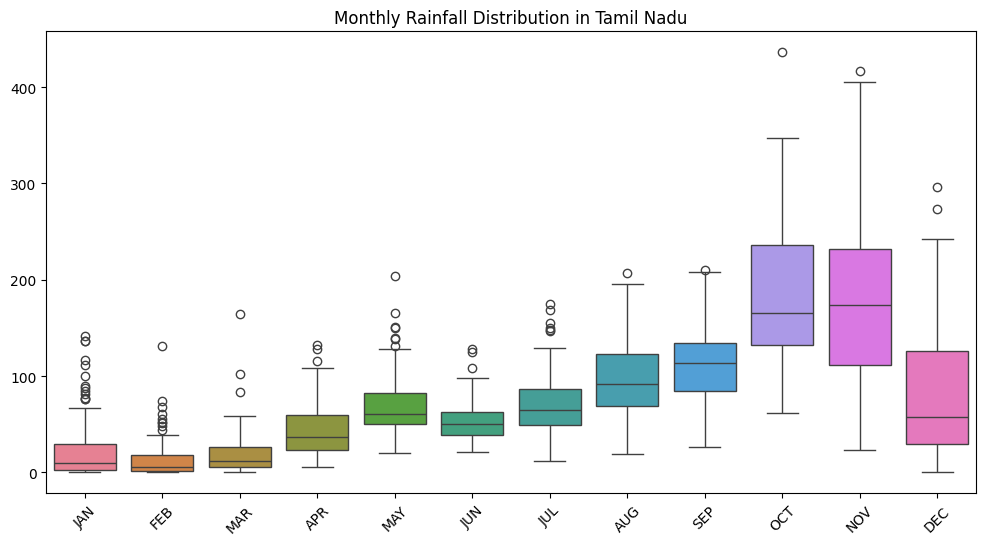

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/rainfall in india 1901-2015.csv")

# Filter for Tamil Nadu
df_tn = df[df['SUBDIVISION'] == 'TAMIL NADU']

# Handle missing values
df_tn.fillna(df_tn.median(numeric_only=True), inplace=True)

# Feature selection
X = df_tn[['YEAR', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']]
y = df_tn['ANNUAL']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Training and evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Predictions for 2016-2025
future_years = pd.DataFrame({
    "YEAR": list(range(2016, 2026)),
    "Jan-Feb": np.mean(X_train['Jan-Feb']),
    "Mar-May": np.mean(X_train['Mar-May']),
    "Jun-Sep": np.mean(X_train['Jun-Sep']),
    "Oct-Dec": np.mean(X_train['Oct-Dec'])
})

best_model = XGBRegressor(n_estimators=100, random_state=42)
best_model.fit(X, y)
future_predictions = best_model.predict(future_years)
future_years["Predicted Rainfall"] = future_predictions
print(future_years)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_tn['YEAR'], y=df_tn['ANNUAL'], label="Actual")
sns.lineplot(x=future_years['YEAR'], y=future_years['Predicted Rainfall'], label="Predicted", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Trends in Tamil Nadu")
plt.legend()
plt.show()

# Month-wise Rainfall Trends
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tn[months])
plt.xticks(rotation=45)
plt.title("Monthly Rainfall Distribution in Tamil Nadu")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File loaded successfully!
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7 

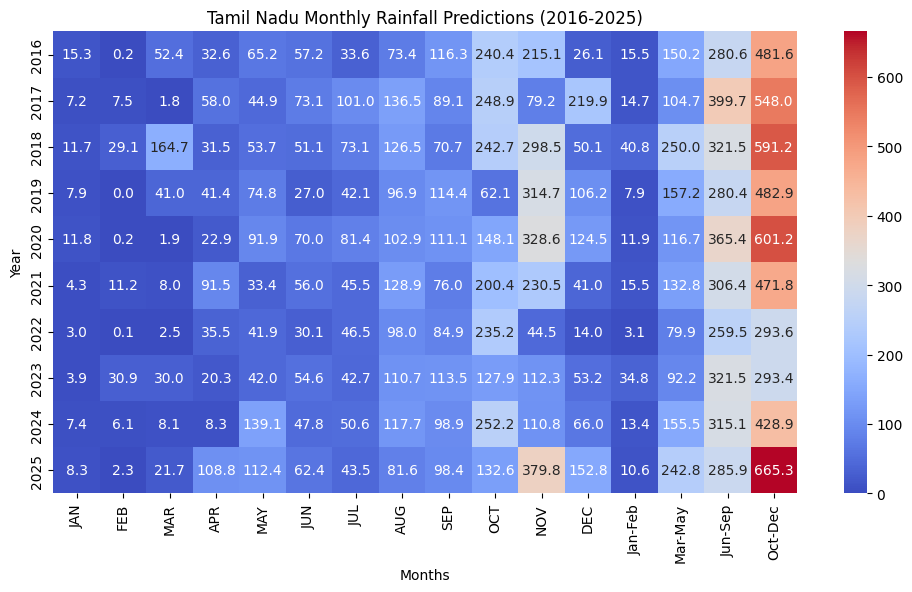

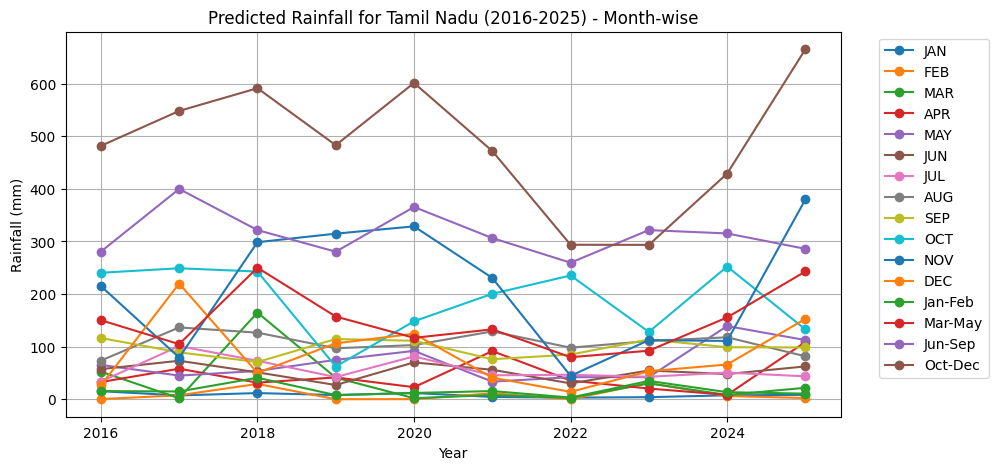

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set File Path
file_path = "/content/drive/MyDrive/rainfall in india 1901-2015.csv"

# Load Dataset
try:
    df = pd.read_csv(file_path)
    print("✅ File loaded successfully!")
except FileNotFoundError:
    print("❌ Error: File not found. Check the path again.")
    raise

# Display Dataset Info
print(df.head())
print(df.info())

# Data Preprocessing
df = df.rename(columns={"SUBDIVISION": "Region", "YEAR": "Year"})
df = df.drop(columns=["ANNUAL"], errors="ignore")  # Drop annual column if exists

# Convert all columns except "Region" and "Year" to numeric
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove NaN values
df.dropna(inplace=True)

# Filter for Tamil Nadu Region
tamil_nadu_data = df[df["Region"] == "TAMIL NADU"]
tamil_nadu_data = tamil_nadu_data.drop(columns=["Region"])  # Drop Region Column

# Define Features (X) and Target (Y)
X = tamil_nadu_data.drop(columns=["Year"])
y = tamil_nadu_data["Year"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ensemble Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions for Test Data
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Predict Future Rainfall (2016-2025)
future_years = np.arange(2016, 2026)
future_X = X.tail(10).reset_index(drop=True)  # Use last 10 years as base trend
future_predictions = model.predict(future_X)

# Create DataFrame for Future Predictions
future_df = pd.DataFrame(future_X, columns=X.columns)
future_df["Year"] = future_years
future_df["Predicted Year"] = future_predictions

# Reshape for Month-wise Predictions
month_cols = list(X.columns)
full_pred_df = pd.DataFrame(future_df[month_cols].values, columns=month_cols)
full_pred_df["YEAR"] = future_years

print("\n🌧️ Month-wise Rainfall Predictions for Tamil Nadu (2016-2025):")
print(full_pred_df)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(full_pred_df.set_index("YEAR"), cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Tamil Nadu Monthly Rainfall Predictions (2016-2025)")
plt.ylabel("Year")
plt.xlabel("Months")
plt.show()

# Visualization - Future Predictions
plt.figure(figsize=(10, 5))
for col in month_cols:
    plt.plot(future_years, full_pred_df[col], marker="o", linestyle="-", label=col)

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Predicted Rainfall for Tamil Nadu (2016-2025) - Month-wise")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()
